# **Lab 1** - C. Soneira:
### *Light distribution, velocity dispersion and mass of M87*

## **Question 1**: Isophotes and brightness profile

### **1a.** In a Figure 1 show real (rough) isophotes of M87 using the software DS9. Is there some anomaly at a radius of about 40 pixels (OJA = optical jet anomaly)? Why does this OJA produce a significant increase in ellipticity and a shift of about 50º in the instrumental position angle?

The image of M87 in a range of 100 pixels (1 pixel = 0.3'', so the range is 30'') is as it follows. We can clearly see the structure of the jet in the left of the figure coming from the AGN.

<img src="photo.png" alt="photo" width="500"/>

Also we can show the isophotes to reassure this statement. Clearly the local maxima of brightness in the left of the figure is due to the inner blob of the jet we saw in the previous figure. Of course, if we try to calculate the ellipticity and position angle of each isophote fitting them by ellipses without paying atention to the surroundings of the image we can see a significant increase in ellipticity and also a remarkable shift in the PA as the radius of the ellipse grows. The explanation to this phenomenon is the presence of the jet, causing a great change on the shape and orientation of the isophotes at a distance of about 42 pixels (as we calculated in the lab session); the PA of the inner blob is about 80 degrees, very different to the estimated PAs seen in the .dat file.

<img src="contour.png" alt="contour" width="500"/>

### 1b. Draw a Figure 2 including the profile of the uncalibrated surface magnitude $\mu(R)$, where $R$ is the semi-major axis (SMA) length in arc second. The figure should depict errors $\sigma=\frac{\sigma_{\textrm{lower}}+\sigma_{\textrm{upper}}}{2}$, i.e. construct symmetric error bars by averaging the lower and upper magnitude errors, which in general are very similar and likely underestimated (very small values).

We import the needed libraries.

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize as sp

Also we import the data:

In [30]:
X = pd.read_fwf('file1.dat', sep = " ",header = None, skiprows=6)
Y = pd.read_fwf('file3.txt', sep = " ",header = None, skiprows=4)

SMA = X[1]
RSMA = Y[1]

MAG = Y[2]
MAG_L_ERR = Y[3]
MAG_R_ERR = Y[4]

MAG_ERR = (MAG_L_ERR + MAG_R_ERR)/2

Now we plot SMA vs. the magnitude:

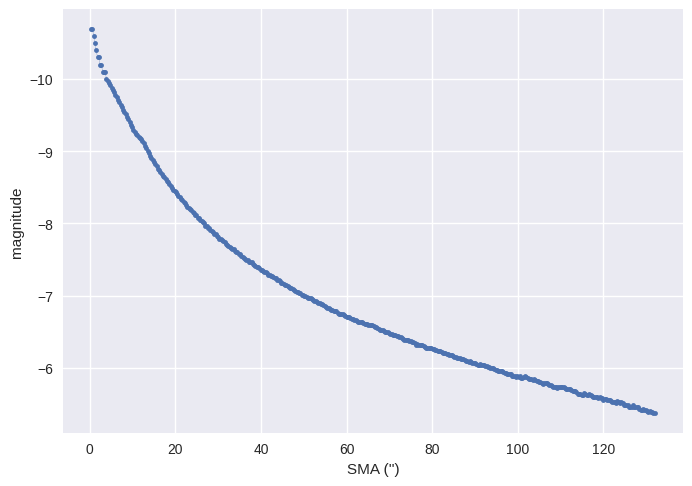

In [37]:
plt.rcParams["figure.figsize"] = (10,6)
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
plt.errorbar(SMA*0.3,MAG, MAG_ERR, marker = ".",linewidth=0.2)
plt.xlabel("SMA ('')")
plt.ylabel("magnitude")
ax.invert_yaxis()
plt.show()

And now we plot RSMA vs. the magnitude:

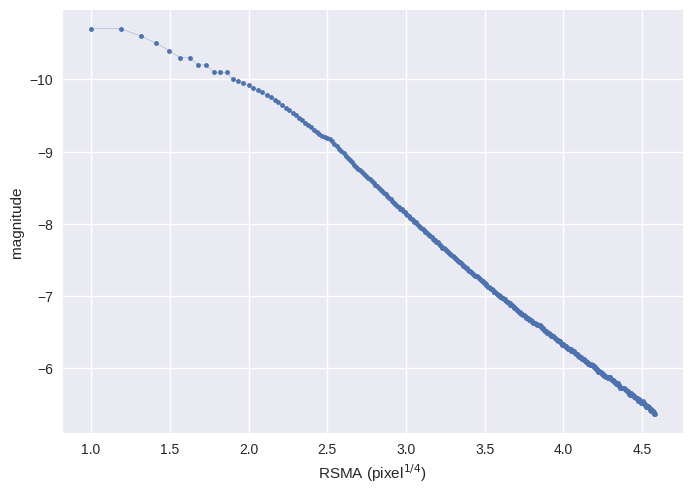

In [38]:
fig, ax = plt.subplots()
plt.errorbar(RSMA,MAG, MAG_ERR, marker = ".",linewidth=0.2)
plt.xlabel("RSMA (pixel$^{1/4}$)")
plt.ylabel("magnitude")
ax.invert_yaxis()
plt.show()

### 1c. Fit a De Vaucouleurs law to the observed profile $\mu(R)$ by minimising the sum of squared deviations between data and model. Neglecting formal errors, the data $\mu_{i}$ can be modelled as a linear law $y = a + b x_{i}$, where $x_{i}=R_{i}^{1/4}$. Draw a Figure 3 showing the best fit (least square method) along with the observational data. Are you dealing with a standard elliptical galaxy that follows a De Vaucouleurs law? If you find systematics, try to fit a Sersic law with an arbitrary index n

Now we fit the data to the generic function $y = a + b x_{i}$, where $x_{i}=R_{i}^{1/n}$. For $n=4$ we are working in the De Vacouleurs case, but we are going to fit through several values of $n$. In the legend of the figure we show the sum of squared deviations and the $n$. **We are cutting the data where the radius is not affected by the seeing, i.e. at approximately 3 times the FWHM (15 pixels)**. In this same script we calculate the value of $R_{e}$ and its uncertainty.

It seems interesting to set different values for the initial pixel radius we are considering to do our fitting, since we have seen in the previous pictures the effect of the jet in the luminosity and we know we need to start in 15 pixel to avoid the region affected by the seeing.

We are using the refences of the article *The supermassive black hole mass-Sérsic index relations for bulges and elliptical galaxies* by Savorgnan (2013), which indicates three values for the Sersic index of M87 (NGC 4486) by different analysis:
- $n = 6.86$ for a pure Sersic profile,
- $n=2.4$ for a Sersic profile with masked centre and
- $n=4$ for  Sersic profile with a gaussian.

Also, in the paper by Liu, $R_{e}$ = 108.7'', so $R_{e} = 8.62\ \textrm{kpc}$ (based on a distance of 16.4 Mpc).

#### **From pixel 15: ignoring the jet effect.**
In this case we are going to perform the standard fitting we tried, only accounting for the seeing and ignoring the jet of this AGN. In this case, though, we obtain a very low effective radius, since the exponent is so big.

This case gives
- **Better case**: Effective radius of ( 2.64 +- 0.03 ) kpc for n = 6.70 (Sersic profile)
- **De Vac case**: Effective radius of ( 34.24 +- 0.33 ) kpc for n = 4.11 (De Vacouleurs profile)

#### **From pixel 50: taking into account the jet effect.**
Now we fit only for the luminosity out of the radius that contains the jet. We try to avoid its effect and only account for the light coming from the galaxy. In this case, we obtain:

This case gives
- **Better case**: Effective radius of ( 0.00 +- 0.00 ) kpc for n = 12.90 (Sersic profile). The index is so big that the effective radius in negligible.
- **De Vac case**: Effective radius of ( 42.12 +- 0.43 ) kpc for n = 3.97 (De Vacouleurs profile)

The code below allows obtaining all these values only changing the pixel limit parameter here indicated.

In [39]:
pixel_limit = 15

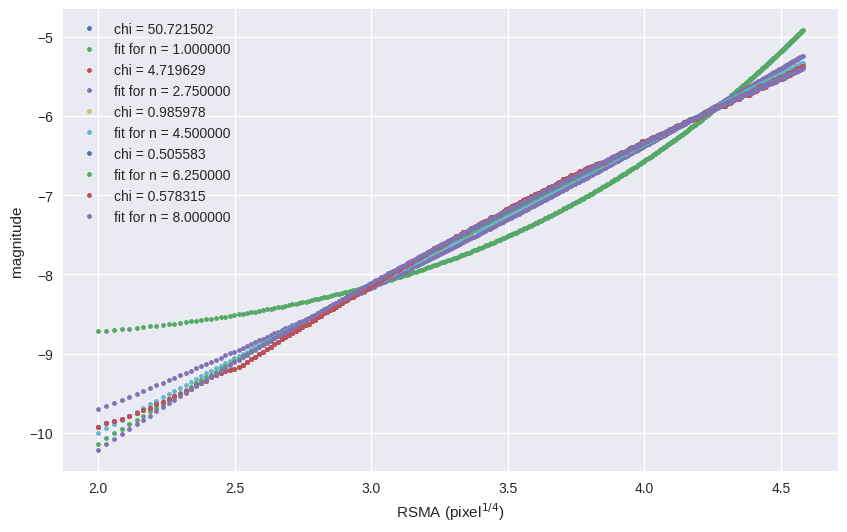

In [56]:
RSMAnew = RSMA[SMA > pixel_limit]
SMAnew = SMA[SMA > pixel_limit]
MAGnew = MAG[SMA > pixel_limit]
MAG_ERRnew = MAG_ERR[SMA > pixel_limit]

fits = 0*MAGnew

#nvec = np.linspace(1,15,28)
nvec = np.linspace(1,8,5)
chis = []
reffs = []
rerrs = []

fig, ax = plt.subplots()
ax.invert_yaxis()

for n in nvec:

    def func(x, a, b):
        return a + b * x**(1/n)

    param, error = sp.curve_fit(func, SMAnew, MAGnew, p0=[1,1])

    ax.invert_yaxis()
    # chi = sum(((func(SMAnew,param[0],param[1])-MAGnew)**2)/MAG_ERRnew**2)
    chi = sum((func(SMAnew,param[0],param[1])-MAGnew)**2)
    
    reff = (8.33/param[1])**n
    rerr = n*(8.33)**n/(param[1])**(n+1)*np.sqrt(error[1,1])
    
    plt.plot(RSMAnew,MAGnew,linewidth=0.01, marker = '.', label = "chi = %f" %chi)
    #plt.plot(RSMAnew,MAGnew,linewidth=0.01, marker = '.')
    plt.plot(RSMAnew,func(SMAnew,param[0],param[1]), marker = '.', linewidth = 0.01, label = "fit for n = %f" %n)
    #plt.plot(RSMAnew,func(SMAnew,param[0],param[1]), marker = '.', linewidth = 0.01)
    plt.xlabel("RSMA (pixel$^{1/4}$)")
    plt.ylabel("magnitude")
    plt.legend()
    
    fits = np.vstack((fits,func(SMAnew,param[0],param[1])))
    chis = np.hstack((chis,chi))
    reffs = np.hstack((reffs,reff))
    rerrs = np.hstack((rerrs,rerr))

plt.show()

### 1d. Determine the best value of the effective radius $R_{e}$ (in '') and its standard uncertainty, and compare your results with that in the paper by Liu et al. 2005 ($R_{e}$ = 108.7''; The Astronomical Journal 129, 2628). Using the distance to M87 (d = 16.4 Mpc; Bird et al. 2010, Astronomy & Astrophysics 524, 71), obtain the radial size $R_{e}$ in kpc and its standard error

With a simple plot we can see what is the best fit for different values of $n$:

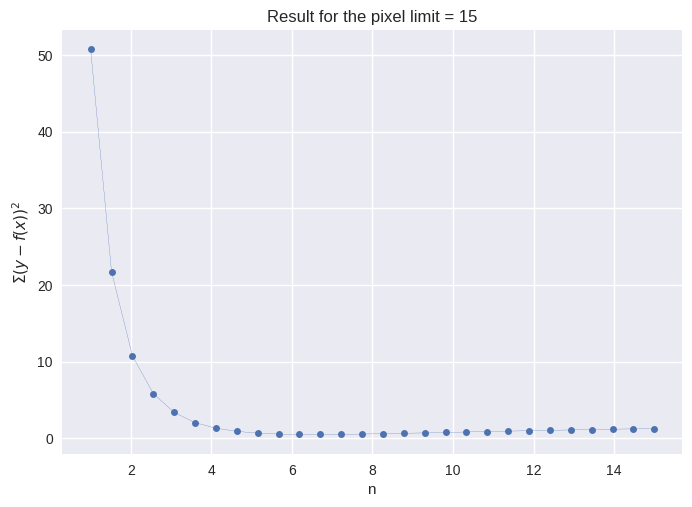

In [42]:
fig, ax = plt.subplots()
plt.plot(nvec,chis,marker="o", linewidth = 0.2, markersize = 5)
plt.xlabel("n")
plt.title("Result for the pixel limit = %2.f" %pixel_limit)
plt.ylabel("$\Sigma(y-f(x))^{2}$")
plt.show()

We see that is has to be not a De Vacouleurs but a Sersic profile, in particular with $n > 4$. We can support the Sersic hypothesis by searching for systematics in the fittings:

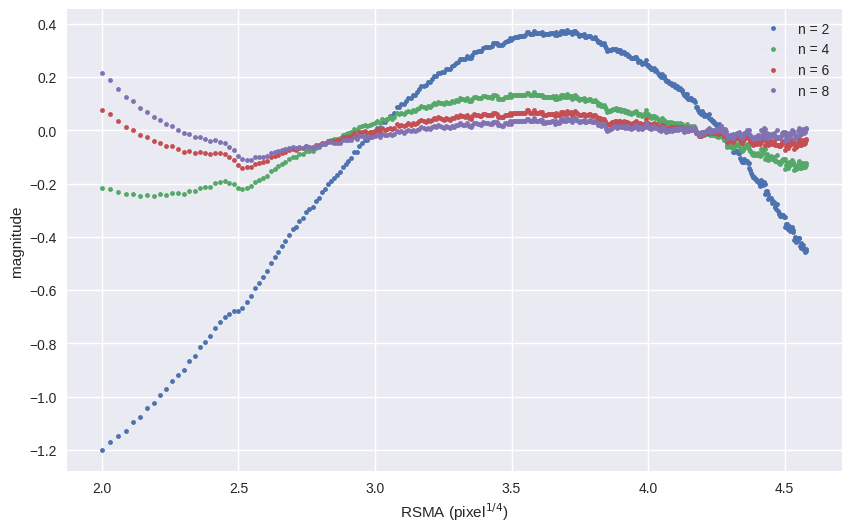

In [57]:
for i in range(len(nvec)):
    if i == 0:
        continue
    plt.plot(RSMAnew,MAGnew-fits[i],linewidth=0.01, marker = '.', label = "n = %i" %nvec[i])
    #plt.plot(RSMAnew,MAGnew-fits[i],linewidth=0.2, marker = '.')
    ax.invert_yaxis()
    plt.xlabel("RSMA (pixel$^{1/4}$)")
    plt.ylabel("magnitude")
    plt.legend()

plt.show()

So clearly the best fit, and then the $R_{e}$ we are interested in, is the one for the best $n$, which can be calculated with the following expression:

$$a+b\cdot R_{i}^{1/n}=a+8.33\cdot\left(\frac{R_{i}}{R_{e}}\right)^{1/n} \iff b = \frac{8.33}{R_{e}^{1/n}}\iff R_{e} = \left( \frac{8.33}{b} \right)^{n}$$

For different values of n, the calculated effective radius is, then, with uncertainties:

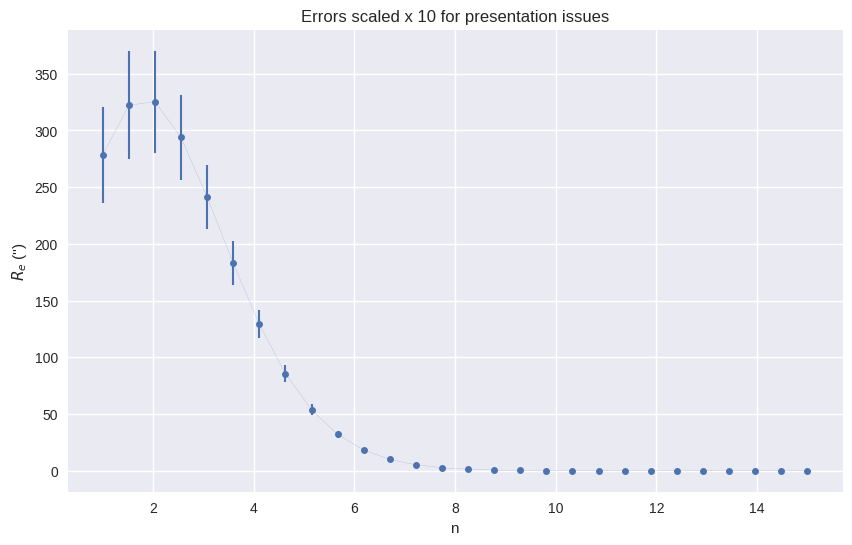

In [51]:
fig, ax = plt.subplots()
plt.errorbar(nvec,reffs*0.3,rerrs*0.3*10, marker = "o",markersize=5,linewidth=0.1,elinewidth=1.5)
plt.ylabel("$R_{e}$ ('')")
plt.xlabel("n")
plt.title("Errors scaled x 10 for presentation issues")
plt.show()

So for the best value, the one with the least sum of squares:

In [52]:
i = np.argmin(chis)

rs = reffs*0.3
rs_err = rerrs*0.3

print("- Effective radius of (", f'{rs[i]:.2f}',"+-",f'{rs_err[i]:.2f}',") '' for n = ",f'{nvec[i]:.2f}', "(Sersic profile)")

- Effective radius of ( 9.95 +- 0.10 ) '' for n =  6.70 (Sersic profile)


If we compare this value with the one provided in the paper by Liu, $R_{e}$ = 108.7'', we can see that our analysis is quite accurate.

Anyway, the values for the $R_{e}$ in kpc and its errors is is

In [53]:
d = 16.4 # in Mpc
reffs_r = reffs*3.141592/180*1/3600 # in rad
rerrs_r = rerrs*3.141592/180*1/3600 # in rad
real = 108.7*3.141592/180*1/3600 #in rad

Re_rea = abs(np.tan(reffs_r)*d) * 1e3 # in kpc
Re_err = abs(np.tan(rerrs_r)*d) * 1e3 # in kpc
Re_real = abs(np.tan(real)*d) * 1e3 # in kpc

Now we can plot these values for different values of $n$:

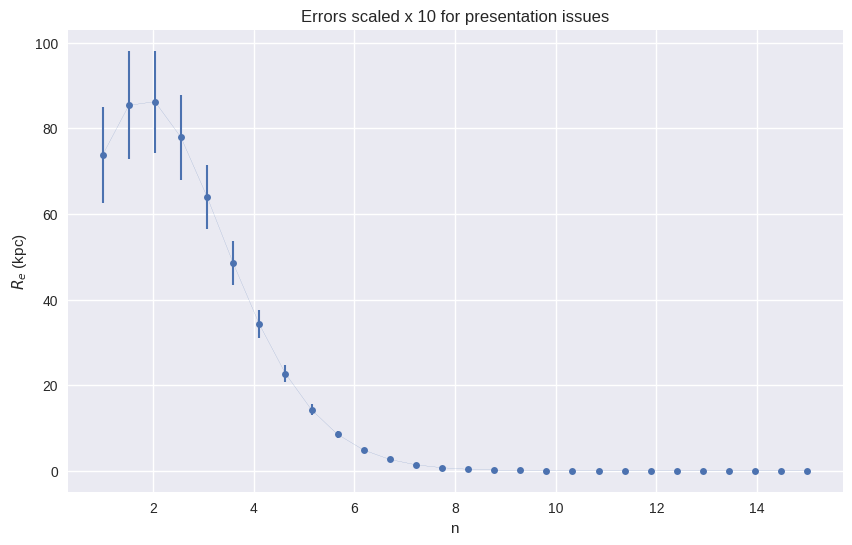

In [54]:
plt.rcParams["figure.figsize"] = (10,6)
fig, ax = plt.subplots()
plt.errorbar(nvec,Re_rea,Re_err*10, marker = "o",markersize=5,linewidth=0.1,elinewidth=1.5)
plt.ylabel("$R_{e}$ (kpc)")
plt.xlabel("n")
plt.title("Errors scaled x 10 for presentation issues")
plt.show()

In [55]:
k = 6
print("- Effective radius of (", f'{Re_rea[i]:.2f}',"+-",f'{Re_err[i]:.2f}',") kpc for n =",f'{nvec[i]:.2f}', "(Sersic profile)")
print("- Effective radius of (", f'{Re_rea[k]:.2f}',"+-",f'{Re_err[k]:.2f}',") kpc for n =",f'{nvec[k]:.2f}', "(De Vacouleurs profile)")

- Effective radius of ( 2.64 +- 0.03 ) kpc for n = 6.70 (Sersic profile)
- Effective radius of ( 34.24 +- 0.33 ) kpc for n = 4.11 (De Vacouleurs profile)


### Conclusion:

- Savorgnan (2013) three values for the Sersic index of M87 (NGC 4486) by different analysis:
    - $n = 6.86$ for a pure Sersic profile,
    - $n=2.4$ for a Sersic profile with masked centre and
    - $n=4$ for  Sersic profile with a gaussian.
- Liu (2005) gives a value for the radius of $R_{e}$ = 108.7'', so $R_{e} = 8.62\ \textrm{kpc}$.

#### **From pixel 15: ignoring the jet effect.**
- **Better case**: Effective radius of ( 2.64 +- 0.03 ) kpc for n = 6.70 (Sersic profile)

#### **From pixel 50: taking into account the jet effect.**
- **Better case**: Effective radius of ( 0.00 +- 0.00 ) kpc for n = 12.90 (Sersic profile)

So we need an equilibrium between the two parameters:
- The most similar effective radius is the 4.73 kpc starting from pixel 15, which does not remove the effect of the jet. It also has a Sersic index of about 6.7, bigger than the De Vacouleurs exponent.
- In the case where we calculate from the pixel 50 nor the radius (virtually 0) nor the index ($\approx 13$) are in any accordance with the parameters from the article, even though it is the most reasonable model due to the avoidin-the-jet discussion.

#### **On the errors**: formal errors are, as seen, too low. From the step in which we considered no error for the magnitude we have been carrying an underestimation of the uncertainties. A more profound analysis could consider realistic, poissonian errors on $L$ to propagate afterwards in $\mu = -2.5\cdot\log(L)$.

## **Question 2**: Velocity dispersion, luminosity and mass
### 2a. Consider the profile of $\sigma(r)$ for M87 (see here below; Murphy et al. 2014, The Astrophysical Journal 785, A143)

<img src="shot.png" alt="shot" width="700"/>

### Estimate the visual luminosity of M87 (LV) and classify it: giant, midsize or dwarf elliptical. Additionally, estimate the stellar mass of the galaxy ($M_{*}$) in $M_{\odot}$, and compare it to that of the Milky Way. Give the $M_{*}/L_{V}$ ratio in $M_{\odot}/L_{\odot}$.

#### **Luminosity**
To estimate the visual luminosity we can use the Faber-Jackson relation, which says that $$L \approx 2\cdot 10^{10} \left( \frac{\sigma}{200 \textrm{km/s}} \right)^{4}\cdot L_{\odot},$$ that, in our case, could have $\sigma \approx 450\ \textrm{km/s}$ according to the previous profile, so it will be: $$L \approx 2\cdot 10^{10} \left( \frac{450}{200} \right)^{4}\cdot L_{\odot}= 5.13\cdot 10^{11}\cdot L_{\odot}.$$ So it is a giant elliptical. We could compare it to the $4\cdot 10^{10}\cdot L_{\odot}$ of the Milky Way.

#### **Mass**
To estimate the stellar mass we could use another scaling relation, this one accounting for the mass: $$R_{e}
\approx 1.4\cdot \left( \frac{M_{*}}{10^{10}\cdot M_{\odot}} \right)^{0.56}.$$ We just need to set the calculated $R_{e}\approx 8.62\ \textrm{kpc}$ in the previous equation: $$M_{*}=10^{10}\cdot \left( \frac{8.62\ \textrm{kpc}}{1.4\ \textrm{kpc}} \right)^{1.79}\cdot M_{\odot}\approx 2.6 \cdot 10^{11} M_{\odot}.$$ Which is much more massive than the Milky Way, with $3 \cdot 10^{10} M_{\odot}$

#### **Mass-to-light ratio**
So the mass-to-luminosity ratio is: $$M_{*}/L_{V} \approx \left( \frac{2.6 \cdot 10^{11} M_{\odot}}{5.13\cdot 10^{11}\cdot L_{\odot}} \right)=0.5\ \frac{M_{\odot}}{L_{\odot}},$$ which can also be compared with the value for the Milky Way: $1.2 \frac{M_{\odot}}{L_{\odot}}$. A lower than one mass-to-luminosity ratio shows that there is much more luminosity than mass according to the values the Sun would have. This is characteristic of giant stars, which likely are the predominant population of M87.

### 2b. In the paper by Cappellari et al. 2013 (MNRAS 432, 1709), it is included a relationship between $M_{\textrm{JAM}}\approx 2 \cdot M_{1/2}$ (where $M_{1/2}$ is the total mass within a sphere with radius $r_{1/2}$ enclosing half of the total galaxy light; this quantity refers to 3D distributions instead to projected ones on the 2D sky!) and normalised values of $\sigma_{e}$ and $R_{e}$ (see the attached figure).

<img src="2.png" alt="2" width="700"/>

### The normalised quantities are $\sigma_{e} = \frac{\sigma_{e}\textrm{ km/s}}{130\textrm{ km/s}}$ and $R_{e} = \frac{R_{e}\textrm{ kpc}}{2\textrm{ kpc}}$. Derive the total mass of the galaxy within $r_{1/2} \approx 1.33\ R_{e}$. Compare this (luminous + dark) mass with that of the Milky Way on a similar radial size. Are you dealing with a massive galaxy?

From the virial theorem we get:

$$M_{1/2}\approx \frac{\sigma_{1/2}^{2}\cdot r_{1/2}}{G}$$

Taking logarithms and doing the approximations $\sigma_{1/2}\propto\sigma_{e}$ and $r_{1/2}\approx R_{e}$ we know that we can write:

$$\log(M_{1/2})=a+2\cdot \log\left(\frac{\sigma_{e}\ \textrm{km/s}}{130\ \textrm{km/s}}\right) + \log\left( \frac{R_{e}\textrm{ kpc}}{2\textrm{ kpc}} \right)$$

Based on the fit of the figure, where we obtain $a\approx 10.6$, the effective radius $R_{e}\approx 108.7''=8.62\ \textrm{kpc}$ from the previous part and $\sigma_{e}\approx 400\ \textrm{km/s}$, the average from the centre to the $R_{e}$, from the first figure of the Question 2, the expression takes the more concrete formulation of:

$$\log(M_{1/2})=10.6+2\cdot \log\left(\frac{400\ \textrm{km/s}}{130\ \textrm{km/s}}\right) + \log\left( \frac{8.26\textrm{ kpc}}{2\textrm{ kpc}} \right)= 10.6 + 2\cdot \log(3.08) + \log(4.13)\approx 12.19$$

This implies, finally, a mass of $$M_{1/2}\approx 10^{12}\ M_{\odot},$$ which is one order of magnitude bigger than the stellar mass, $2.6 \cdot 10^{11} M_{\odot}$.